# 4.4 MLP - Stochastic Gradient Descent Method

In [1]:
''' 
 Author: Yoonhyuck WOO / JBNU_Industrial Information system Engineering
 Date; 3. 19. 2020 - 
 Title: Artificial Intelligence_Project 2
 Professor: Seung-Hoon Na'''
  
import numpy as np
import random
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

# dataset 1번째 방법

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=True)

In [3]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


# dataset 2번째 방법

In [4]:
from sklearn import datasets
mnist = datasets.fetch_openml('mnist_784')

In [5]:
(mnist.data.shape, mnist.target.shape)

((70000, 784), (70000,))

In [6]:
np.unique(mnist.target)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [7]:
data=list(zip(mnist.data,mnist.target))
#data=np.concatenate((mnist.data,mnist.target),axis=1)
data=np.array(data)
x=data[:,0]
x=np.array(x)
#y=data[:,1]
print(x.shape)
#print(y)

(70000,)


In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
mnist.target = encoder.fit_transform(mnist.target.reshape(-1, 1))

In [9]:

train_idx=int(data.shape[0]*0.85)
dev_idx=int(data.shape[0]*0.05)
test_idx=int(data.shape[0]*0.1)

data=np.array(mnist.data)
target=np.array(mnist.target)

train_x=data[0:train_idx,:]
test_x=data[train_idx:train_idx+test_idx,:]
dev_x=data[train_idx+test_idx:train_idx+test_idx+dev_idx,:]


train_y=target[0:train_idx,:]
test_y=target[train_idx:train_idx+test_idx,:]
dev_y=target[train_idx+test_idx:train_idx+test_idx+dev_idx,:]

print('train')
print(train_x.shape)
print(train_y.shape)
print('test')
print(test_x.shape)
print(test_y.shape)
print('dev')
print(dev_x.shape)
print(dev_y.shape)

train
(59500, 784)
(59500, 10)
test
(7000, 784)
(7000, 10)
dev
(3500, 784)
(3500, 10)


### Layer

In [10]:
class Layer():
    def __init__(self,input_size,output_size):
#         self.w = np.random.randn(input_size,output_size)
#         self.b = np.random.randn(output_size)
        
        self.w = np. random.randn(input_size,output_size)
        self.b = np.zeros(output_size)
        self.dydw = None
        self.dydb = 1 
        
    def forward(self,X):
        self.dydw = X.T
        affine = np.dot(X,self.w) + self.b
        
        return affine
    
    def backward(self,dLdy,lr):
        dLdw = np.dot(self.dydw,dLdy)
        dLdb = np.sum(np.dot(dLdy, self.dydb),axis=0)
        
        dLdx = np.dot(dLdy,np.transpose(self.w))
       
        self.w -= lr * dLdw
        
        self.b -= lr * dLdb
        
        return dLdx
        

In [11]:
l=Layer(4,5)

l.forward(np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4]]))
print(l.w)
l.backward(np.arange(15).reshape(3,5),0.01)
print(l.w)

[[ 1.30865396 -1.35450396 -2.62433206 -0.71365799  0.27258047]
 [ 2.01329669 -0.52990518  0.38160162 -0.57185455 -0.4313999 ]
 [-1.07405709 -0.94668426  0.69859986 -0.23478413 -1.02281122]
 [ 1.82819344  0.61929077  0.59288127 -0.52661734  0.28780851]]
[[ 1.15865396e+00 -1.53450396e+00 -2.83433206e+00 -9.53657989e-01
   2.58046905e-03]
 [ 1.71329669e+00 -8.89905177e-01 -3.83983786e-02 -1.05185455e+00
  -9.71399901e-01]
 [-1.52405709e+00 -1.48668426e+00  6.85998578e-02 -9.54784129e-01
  -1.83281122e+00]
 [ 1.22819344e+00 -1.00709229e-01 -2.47118728e-01 -1.48661734e+00
  -7.92191490e-01]]


# Make Relu class

In [12]:
class Relu():
    def __init__(self):
        self.mask = None
        
    def forward(self,x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
#         print('dout',dout.shape)
#         print('mask',self.mask.shape)
        dout[self.mask]= 0
        #dout * np.where(self.mask==True,1,0)
        return dout * np.where(self.mask==True,1,0)

## Model

In [13]:
#마지막
class Model():
    def __init__(self,length):
        self.layers = [Layer(784,100),
                       Relu(),
                       Layer(100,50),
                       Relu(),
                       Layer(50,30),
                       Relu(),
                       Layer(30,10),
                       ]
    
    def forward(self,put):
        output = self.layers[0].forward(put)
        output = self.layers[1].forward(output)
        
        output = self.layers[2].forward(output)
        output = self.layers[3].forward(output)
        
        output = self.layers[4].forward(output)
        output = self.layers[5].forward(output)
        
        output = self.layers[6].forward(output)
        
        return output
    
    def backward(self, dld_,lr):
        dld_ = self.layers[6].backward(dld_,lr)
        dld_ = self.layers[5].backward(dld_)
        dld_ = self.layers[4].backward(dld_,lr)
        dld_ = self.layers[3].backward(dld_)
        dld_ = self.layers[2].backward(dld_,lr)
        dld_ = self.layers[1].backward(dld_)
        dld_ = self.layers[0].backward(dld_,lr)
        return dld_

# Make softmax class

# Make Cross_entropy class

# Softmax - with - Loss

In [14]:
class SoftmaxwithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
        
    def softmax(self,a):
        c = np.max(a,axis=-1,keepdims=True)
        exp_a = np.exp(a-c)
        sum_exp_a = np.sum(exp_a,axis=-1,keepdims=True)
        y = exp_a / sum_exp_a
        
        return y
    
    def cross_entropy_error(self,y,t):
        delta = 1e-13
        return -np.sum(t * np.log(y + delta)) / x.shape[0]
    
    def forward(self,x,t):
        self.t = t
        self.y = self.softmax(x)
        self.loss = self.cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

In [15]:
a = np.array([[1,2,3,4],[5,6,7,8]])
print(np.max(a,axis=-1,keepdims=True))

sml = SoftmaxwithLoss()
b = sml.softmax(a)
print(b)
print(np.sum(b))

[[4]
 [8]]
[[0.0320586  0.08714432 0.23688282 0.64391426]
 [0.0320586  0.08714432 0.23688282 0.64391426]]
2.0


# 4.4

Minibatch size(10~500):  100
epoch size:  80


============================== train ==============================
************* 10 번차 epoch *************
정확도
0.36031932773109243
************* 20 번차 epoch *************
정확도
0.4523697478991597
************* 30 번차 epoch *************
정확도
0.4844033613445378
************* 40 번차 epoch *************
정확도
0.5412436974789916
************* 50 번차 epoch *************
정확도
0.5112941176470588
************* 60 번차 epoch *************
정확도
0.5196470588235295
************* 70 번차 epoch *************
정확도
0.5395294117647059
************* 80 번차 epoch *************
정확도
0.5751932773109244
============================== test ==============================
************* 10 번차 epoch *************
정확도
0.6992857142857143
************* 20 번차 epoch *************
정확도
0.7838571428571428
************* 30 번차 epoch *************
정확도
0.857
************* 40 번차 epoch *************
정확도
0.9008571428571429
************* 50 번차 epoch *************
정확도
0.9232857142857143
************* 60 번차 epoch *************
정확도
0.947
********

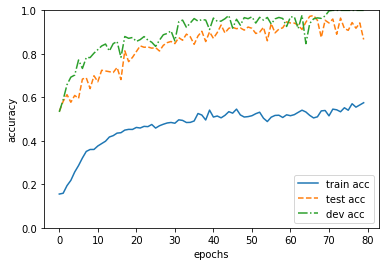

In [18]:
model = Model(3)
relu = Relu()
swl = SoftmaxwithLoss()

length = 3
minibatch_size = int(input('Minibatch size(10~500): '))
epoch_size = int(input('epoch size: '))
iter_per_epoch = 10
test_acc_list = []

# td = np.array([[1,2,3], [1,0,0], [3,2,3], [3,0,0], [5,2,3], [5,0,0], [7,2,3], [7,0,0], [9,2,3]])
# tg = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9]])


def accuracy(x, t):
    acc_y = model.forward(x)
    acc_y = swl.softmax(acc_y)
    acc_y = np.argmax(acc_y, axis=1)
    if t.ndim != 1 : t = np.argmax(t,axis=1)
        
    accuracy = np.sum(acc_y == t) / float(x.shape[0])
    
    return accuracy

def learning(X,y, minibatch_size, epoch_size, learning_rate):
    acc_list = []
    for e in range(1,epoch_size+1):
        
        combined = list(zip(X, y))
        permut = np.random.permutation(combined)
        X[:], y[:] = zip(*permut)
        #X = X/255
    
        
        number_minibatch= np.int(np.ceil(X.shape[0] / minibatch_size))
        
        for n in range(1, number_minibatch+1):

            X_temp=X[minibatch_size * n-(minibatch_size-1)-1:minibatch_size*n]
            y_temp=y[minibatch_size * n-(minibatch_size-1)-1:minibatch_size*n]
            
            c = model.forward(X_temp)
            J = swl.forward(c,y_temp)
        
            dJdh = swl.backward()
            model.backward(dJdh,learning_rate)

 
        c = model.forward(X)
        J = swl.forward(c,y)


        acc = accuracy(X, y)

        acc_list.append(acc)
        if e % iter_per_epoch == 0:
            print('*************',e,'번차 epoch *************')
    #             print('최종')
    #             print(J)
            print('정확도')
            print(acc)
        
    return acc_list

#print(learning(train_x, train_y, minibatch_size, epoch_size, 0.01))
print('='*30,'train','='*30)
train = learning(train_x, train_y, minibatch_size, epoch_size, 0.0000001)
print('='*30,'test','='*30)
test = learning(test_x, test_y, minibatch_size, epoch_size, 0.0000001)
print('='*30,'dev','='*30)
dev = learning(dev_x, dev_y, minibatch_size, epoch_size, 0.0000001)
 

x = np.arange(len(train))
plt.plot(x, train, label='train acc')
plt.plot(x, test, label='test acc', linestyle='--')
plt.plot(x, dev, label='dev acc', linestyle='-.')

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
# print("train acc, test acc | " 
#       + str(learning(x_train, t_train, minibatch_size, epoch_size, 0.0001)) + ", " 
#       + str(learning(x_test, t_test, minibatch_size, epoch_size, 0.0001)))